# STC TV User Behavior Analysis - Task 1

In [91]:
# Import the required libraries 
import pandas as pd
import pyxlsb
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

## Data Loading and Preprocessing:

In [92]:
dataframe = pd.read_excel("stc TV Data Set_T1.xlsb", sheet_name="Final_Dataset")

In [93]:
dataframe

,Column1,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,1,42882,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets
1,3,42876,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana
2,4,42957,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
3,5,42942,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
4,7,42923,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1247848,42847,23716,Extraterrestrial,4865,MOVIE,0,0,Horror MovieExtraterrestrial (HD),Horror,0,0,Extraterrestrial
1048571,1247849,43068,1776,Friends The One With The Holiday Armadillo,1261,SERIES/EPISODES,7,10,Comedy MovieThe One With The Holiday Armadillo...,Comedy,0,0,Friends
1048572,1247850,42901,1918,Masters of Horror Dreams In The Witch House,6,SERIES/EPISODES,1,2,Horror MovieDreams In The Witch House,Horror,0,0,Masters of Horror
1048573,1247851,42989,25737,Two Lovers and a Bear,72,MOVIE,0,0,Drama MovieTwo Lovers and a Bear (HD),Drama,0,1,Two Lovers and a Bear


In [94]:
# check the data shape
dataframe.shape

(1048575, 13)

In [95]:
# Data Preprocessing 
dataframe = dataframe.drop(columns=['Column1'])         # dropping the index col
dataframe['program_name'] = dataframe['program_name'].str.strip()  # trim spaces in movies names to avoid misspellings in input data
dataframe[['duration_seconds', 'season','episode','series_title','hd']] = dataframe[['duration_seconds', 'season','episode','series_title','hd']].apply(pd.to_numeric)  # read numeric cols as numeric data types
dataframe[['user_id_maped', 'program_name','program_class','program_desc','program_genre','original_name']] = dataframe[['user_id_maped', 'program_name','program_class','program_desc','program_genre','original_name']].astype(str) # read string cols as string data types

In [96]:
# Convert date_ Column from Excel Numeric Format to Datetime
date_values_numeric = pd.to_numeric(dataframe['date_'], errors='coerce')
print("--- Contents of date_values_numeric ---")
print("dtype:", date_values_numeric.dtype)
print(date_values_numeric.head())
print("Number of NaNs in date_values_numeric:", date_values_numeric.isnull().sum())
print("------------------------------------")

origin_timestamp = pd.Timestamp('1899-12-30')
print(f"Using origin_timestamp: {origin_timestamp}")
print("------------------------------------")

try:
    dataframe['date_'] = pd.to_datetime(date_values_numeric, unit='D', origin=origin_timestamp, errors='coerce')

    print("\n--- After date conversion (if successful) ---")
    print("Current 'date_' column head:")
    print(dataframe['date_'].head())
    print("\nCurrent 'date_' column dtype:")
    print(dataframe['date_'].dtype)
    print("\nNumber of NaT (Not a Time) values in 'date_':", dataframe['date_'].isnull().sum())
    print("------------------------------------")

except Exception as e:
    print(f"\nERROR during pd.to_datetime conversion: {e}")
    print("------------------------------------")

--- Contents of date_values_numeric ---
dtype: int64
0    42882
1    42876
2    42957
3    42942
4    42923
Name: date_, dtype: int64
Number of NaNs in date_values_numeric: 0
------------------------------------
Using origin_timestamp: 1899-12-30 00:00:00
------------------------------------

--- After date conversion (if successful) ---
Current 'date_' column head:
0   2017-05-27
1   2017-05-21
2   2017-08-10
3   2017-07-26
4   2017-07-07
Name: date_, dtype: datetime64[ns]

Current 'date_' column dtype:
datetime64[ns]

Number of NaT (Not a Time) values in 'date_': 0
------------------------------------


In [97]:
# display the dataset after applying data types and dropping the frist col ['Column1']
dataframe.head()

,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,2017-05-27,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets
1,2017-05-21,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana
2,2017-08-10,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
3,2017-07-26,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
4,2017-07-07,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill


In [98]:
# describe the numeric values in the dataset 
dataframe.describe()

,date_,duration_seconds,season,episode,series_title,hd
count,1048575,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2017-10-04 00:23:20.346183936,1.230957e+03,1.342139e+00,6.157952e+00,1.205922e-02,3.862728e-01
min,2017-03-14 00:00:00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2017-06-10 00:00:00,5.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2017-10-14 00:00:00,1.190000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,2018-01-21 00:00:00,1.328000e+03,1.000000e+00,9.000000e+00,0.000000e+00,1.000000e+00
max,2018-04-30 00:00:00,1.461329e+06,2.300000e+01,2.820000e+02,1.000000e+00,1.000000e+00
std,NaN,6.821058e+03,2.104095e+00,1.222015e+01,1.091504e-01,4.868946e-01


In [120]:
# checking if there are any duplicates in the dataset
number_of_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows in the DataFrame: {number_of_duplicates}")
# Number of duplicates found: 102074

Number of duplicate rows in the DataFrame: 0


In [102]:
# to confirm the number of rows before and after, and the number of duplicates
print(f"Original number of rows in df: {len(df)}")
number_of_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows found: {number_of_duplicates}")

if number_of_duplicates > 0:
    df.drop_duplicates(inplace=True)
    df.reset_index(drop=True, inplace=True)
    
    print(f"Number of rows in df after dropping duplicates: {len(df)}")
    print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")
else:
    print("No duplicates were found to remove.")

# now the 'df' DataFrame is distinct/not-duplicated, and ready for further analysis.

Original number of rows in df: 1048575
Number of duplicate rows found: 102074
Number of rows in df after dropping duplicates: 946501
Number of duplicate rows after removal: 0


In [103]:
# check if any column has null value in the dataset
dataframe.isnull().any()

date_               False
user_id_maped       False
program_name        False
duration_seconds    False
program_class       False
season              False
episode             False
program_desc        False
program_genre       False
series_title        False
hd                  False
original_name       False
dtype: bool

In [72]:
# makign a copy of the dataframe
df=dataframe.copy()

# Content Popularity Analysis:

In [104]:
# Here we try to get the most watched movies (Total Views / Total Users Views / Total watch time)
# For series we concatenated the Session episode to differentiate between episodes 
grouped=df.copy()
grouped.loc[grouped['program_class'] == 'SERIES/EPISODES', 'program_name'] = grouped['program_name']+'_SE'+grouped['season'].astype(str)+'_EP'+grouped['episode'].astype(str)
grouped = grouped.groupby(['program_name','program_class'])\
.agg({'user_id_maped': [('co1', 'nunique'),('co2', 'count')],\
      'duration_seconds': [('co3', 'sum')] }).reset_index()
grouped.columns = ['program_name','program_class','No of Users who Watched', 'No of watches', 'Total watch time in seconds']
grouped['Total watch time in houres']=grouped['Total watch time in seconds']/3600
grouped = grouped.drop(columns=['Total watch time in seconds'])
grouped = grouped.sort_values(by=['Total watch time in houres', 'No of watches','No of Users who Watched'], ascending=False).reset_index(drop=True)


In [105]:
# show the result
grouped.head(35)

,program_name,program_class,No of Users who Watched,No of watches,Total watch time in houres
0,The Boss Baby,MOVIE,3389,15065,2737.061111
1,The Amazing pider-Man,MOVIE,1011,2860,1963.635278
2,The Expendables,MOVIE,853,2097,1960.951944
3,Moana,MOVIE,2173,6604,1675.437222
4,Trolls,MOVIE,2613,9158,1468.338889
5,Bean,MOVIE,949,3004,1412.316111
6,The murfs,MOVIE,867,2807,1334.981111
7,Hotel Transylvania,MOVIE,491,1854,1092.934722
8,Cloudy With a Chance of Meatballs,MOVIE,683,1951,946.198056
9,The Man With The Iron Fists,MOVIE,707,2267,856.115833


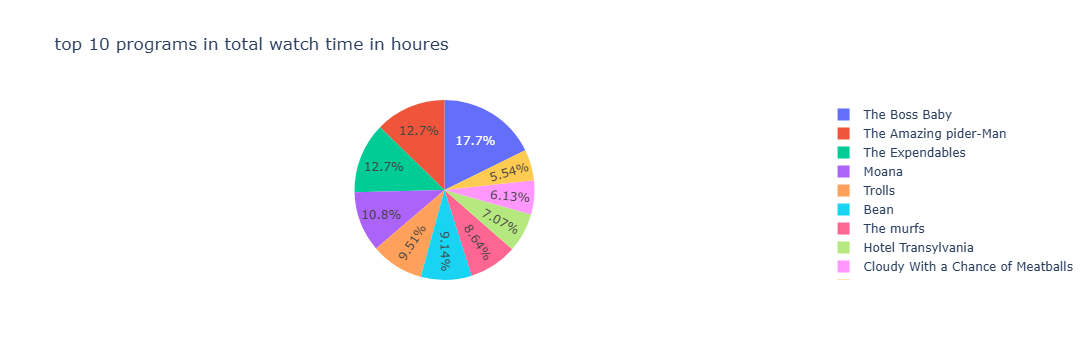

In [106]:
# plot top 10 Programs 
fig = px.pie(grouped.head(10), values='Total watch time in houres', names='program_name',\
             hover_data=['program_class'],title='top 10 programs in total watch time in houres')
fig.show()

# Program Class Analysis (Movies vs Series):


In [107]:
# Here we try to study the customer experience against Program class
grouped=df.copy()
grouped = grouped.groupby('program_class')\
.agg({'user_id_maped': [('co1', 'nunique'),('co2', 'count')],\
      'duration_seconds': [('co3', 'sum')] }).reset_index()
grouped.columns = ['program_class','No of Users who Watched', 'No of watches', 'Total watch time in seconds']
grouped['Total watch time in houres']=grouped['Total watch time in seconds']/3600
grouped = grouped.drop(columns=['Total watch time in seconds'])
grouped = grouped.sort_values(by=['Total watch time in houres', 'No of watches','No of Users who Watched'], ascending=False).reset_index(drop=True)


In [108]:
# show the result
grouped.head()

,program_class,No of Users who Watched,No of watches,Total watch time in houres
0,SERIES/EPISODES,3901,554276,253841.503611
1,MOVIE,11355,392225,101142.977222


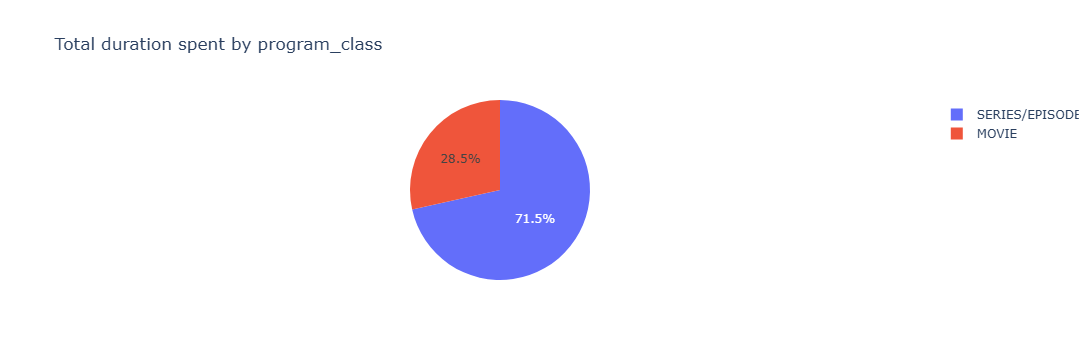

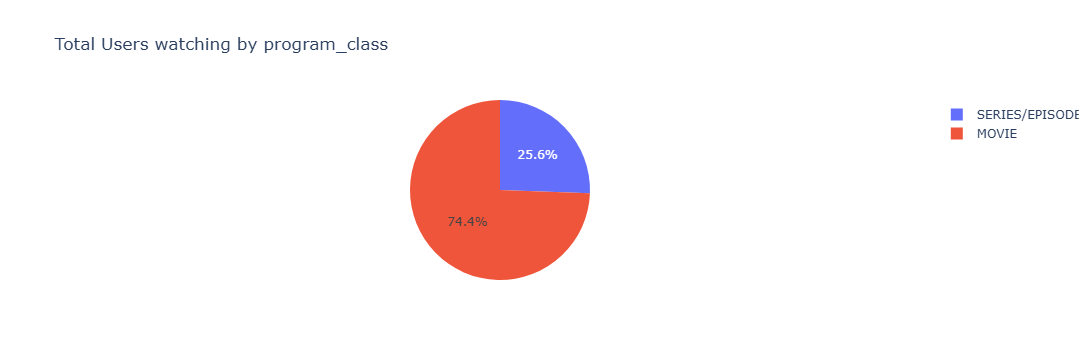

In [109]:
# plotting the total watch time against total number of users and reporting the findings
fig = px.pie(grouped, values='Total watch time in houres', names='program_class',\
             hover_data=['program_class'],title='Total duration spent by program_class')
fig2 = px.pie(grouped, values='No of Users who Watched', names='program_class',\
             hover_data=['program_class'],title='Total Users watching by program_class')

fig.update_traces(sort=False)
fig2.update_traces(sort=False)
fig.show()
fig2.show()

In [110]:
genre_engagement = df.groupby(['program_class', 'program_genre']).size().reset_index(name='viewing_sessions')

# Top genres for MOVIES
top_movie_genres = genre_engagement[genre_engagement['program_class'] == 'MOVIE'].sort_values(by='viewing_sessions', ascending=False)
print("\nTop Movie Genres by Viewing Sessions:")
print(top_movie_genres.head())

# Top genres for SERIES/EPISODES
top_series_genres = genre_engagement[genre_engagement['program_class'] == 'SERIES/EPISODES'].sort_values(by='viewing_sessions', ascending=False)
print("\nTop Series/Episode Genres by Viewing Sessions:")
print(top_series_genres.head())


Top Movie Genres by Viewing Sessions:
  program_class program_genre  viewing_sessions
2         MOVIE     Animation            109978
0         MOVIE        Action            100139
4         MOVIE        Comedy             57668
7         MOVIE         Drama             38837
9         MOVIE        Horror             34037

Top Series/Episode Genres by Viewing Sessions:
      program_class program_genre  viewing_sessions
15  SERIES/EPISODES     Animation            248225
20  SERIES/EPISODES         Drama            103336
17  SERIES/EPISODES        Comedy             67132
14  SERIES/EPISODES        Action             61967
22  SERIES/EPISODES        Horror             34881


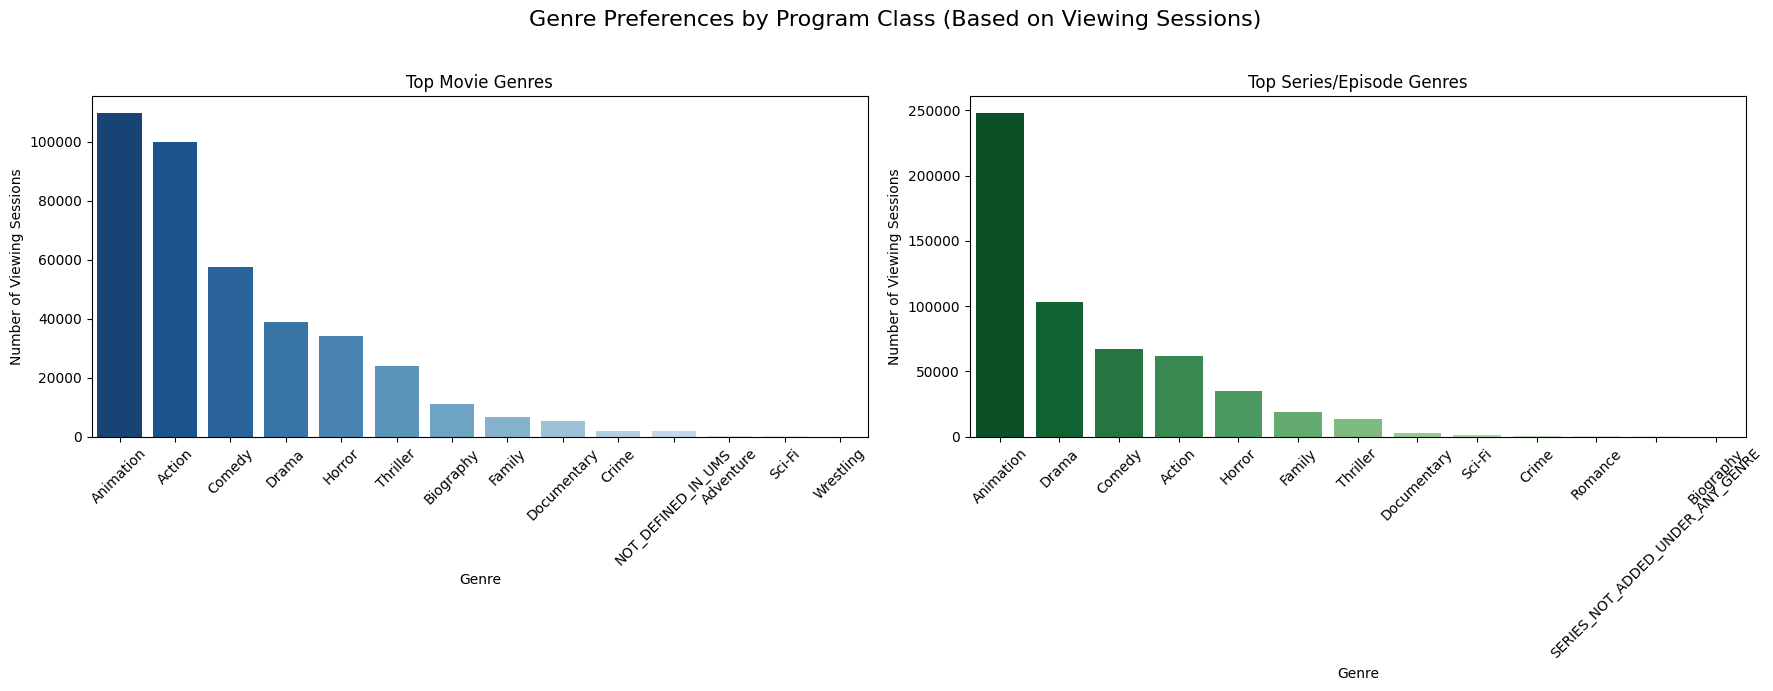

In [111]:
# Set up the figure and axes for two plots side-by-side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))
fig.suptitle('Genre Preferences by Program Class (Based on Viewing Sessions)', fontsize=16)

# Plot for Top Movie Genres 
sns.barplot(data=top_movie_genres, 
            x='program_genre', 
            y='viewing_sessions', 
            hue='program_genre', 
            palette='Blues_r', 
            legend=False,         
            ax=axes[0])
axes[0].set_title('Top Movie Genres')
axes[0].set_xlabel('Genre')
axes[0].set_ylabel('Number of Viewing Sessions')
axes[0].tick_params(axis='x', rotation=45)

# Plot for Top Series/Episode Genres 
sns.barplot(data=top_series_genres, 
            x='program_genre', 
            y='viewing_sessions', 
            hue='program_genre',  
            palette='Greens_r', 
            legend=False,         
            ax=axes[1])
axes[1].set_title('Top Series/Episode Genres')
axes[1].set_xlabel('Genre')
axes[1].set_ylabel('Number of Viewing Sessions')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()


Viewing sessions by Day of Week and Program Class:
program_class     MOVIE  SERIES/EPISODES
day_of_week_name                        
Friday            67395            74088
Monday            52383            81931
Saturday          63692            82354
Sunday            49304            78611
Thursday          57559            75533
Tuesday           52057            82215
Wednesday         49835            79544


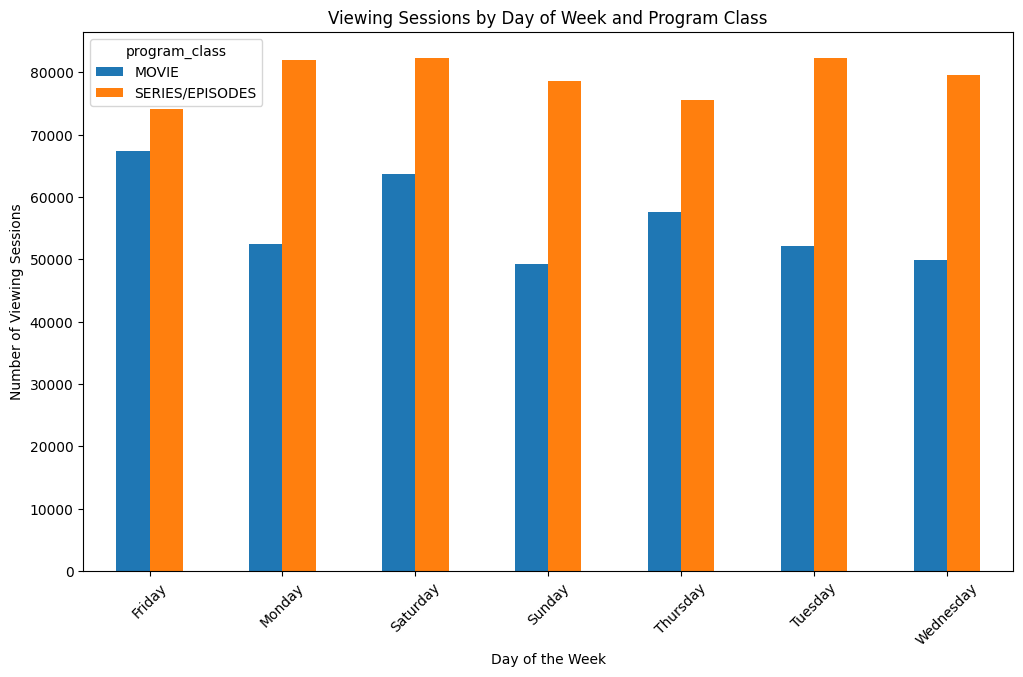

In [112]:
df['day_of_week_name'] = df['date_'].dt.day_name() # just making sure again 'date_' is datetime
# Weekdays order:
# days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sessions_by_day_class = df.groupby(['day_of_week_name', 'program_class']).size().unstack(fill_value=0)
print("\nViewing sessions by Day of Week and Program Class:")
print(sessions_by_day_class)

# Visualization (bar chart)
sessions_by_day_class.plot(kind='bar', figsize=(12, 7), title='Viewing Sessions by Day of Week and Program Class')
plt.ylabel('Number of Viewing Sessions')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.show()

# HD vs SD Viewing Behavior:

In [113]:
print("Unique values in 'hd' column:", df['hd'].unique())
print("\nDistribution of HD vs. SD viewing sessions (percentage):")
print(df['hd'].value_counts(normalize=True) * 100)
print("\nDistribution of HD vs. SD viewing sessions (raw count):")
print(df['hd'].value_counts())

Unique values in 'hd' column: [0 1]

Distribution of HD vs. SD viewing sessions (percentage):
hd
0    66.173623
1    33.826377
Name: proportion, dtype: float64

Distribution of HD vs. SD viewing sessions (raw count):
hd
0    626334
1    320167
Name: count, dtype: int64



Average watch duration (seconds) by HD status:
hd
0    1534.113384
1     990.348034
Name: duration_seconds, dtype: float64


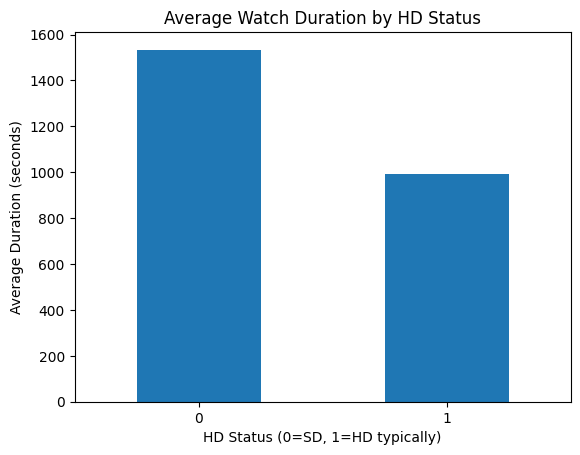

In [114]:
# avg watch duration by hd
avg_duration_by_hd = df.groupby('hd')['duration_seconds'].mean()
print("\nAverage watch duration (seconds) by HD status:")
print(avg_duration_by_hd)

avg_duration_by_hd.plot(kind='bar', title='Average Watch Duration by HD Status')
plt.ylabel('Average Duration (seconds)')
plt.xlabel('HD Status (0=SD, 1=HD typically)') 
plt.xticks(rotation=0)
plt.show()


Total watch time (hours) by HD status:
hd
0    266907.603333
1     88076.877500
Name: duration_seconds, dtype: float64


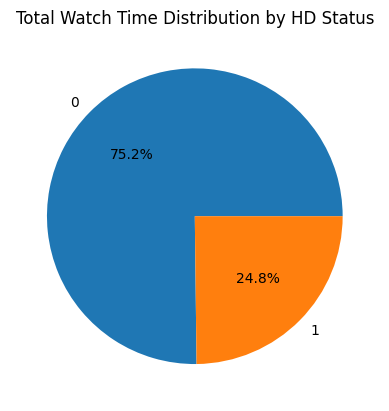

In [115]:
total_watch_time_by_hd = df.groupby('hd')['duration_seconds'].sum() / 3600 # Convert to hours
print("\nTotal watch time (hours) by HD status:")
print(total_watch_time_by_hd)

total_watch_time_by_hd.plot(kind='pie', autopct='%1.1f%%', title='Total Watch Time Distribution by HD Status')
plt.ylabel('')
plt.show()

In [116]:
df

,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name,day_of_week_name
0,2017-05-27,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets,Saturday
1,2017-05-21,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana,Sunday
2,2017-08-10,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess,Thursday
3,2017-07-26,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess,Wednesday
4,2017-07-07,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
946496,2017-04-22,23716,Extraterrestrial,4865,MOVIE,0,0,Horror MovieExtraterrestrial (HD),Horror,0,0,Extraterrestrial,Saturday
946497,2017-11-29,1776,Friends The One With The Holiday Armadillo,1261,SERIES/EPISODES,7,10,Comedy MovieThe One With The Holiday Armadillo...,Comedy,0,0,Friends,Wednesday
946498,2017-06-15,1918,Masters of Horror Dreams In The Witch House,6,SERIES/EPISODES,1,2,Horror MovieDreams In The Witch House,Horror,0,0,Masters of Horror,Thursday
946499,2017-09-11,25737,Two Lovers and a Bear,72,MOVIE,0,0,Drama MovieTwo Lovers and a Bear (HD),Drama,0,1,Two Lovers and a Bear,Monday



Viewing sessions by Program Class and HD Status (Counts):
hd                    0       1
program_class                  
MOVIE            143875  248350
SERIES/EPISODES  482459   71817

Viewing sessions by Program Class and HD Status (% within each Program Class):
hd                       0          1
program_class                        
MOVIE            36.681752  63.318248
SERIES/EPISODES  87.043098  12.956902


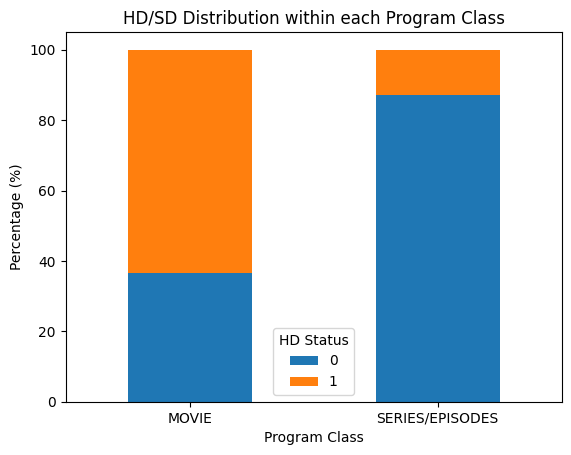

In [117]:
# Crosstabulation to see counts
class_hd_crosstab = pd.crosstab(df['program_class'], df['hd'])
print("\nViewing sessions by Program Class and HD Status (Counts):")
print(class_hd_crosstab)

# Normalize by program class to see percentages (e.g., what % of MOVIE sessions are HD)
class_hd_crosstab_normalized = pd.crosstab(df['program_class'], df['hd'], normalize='index') * 100
print("\nViewing sessions by Program Class and HD Status (% within each Program Class):")
print(class_hd_crosstab_normalized)

class_hd_crosstab_normalized.plot(kind='bar', stacked=True, title='HD/SD Distribution within each Program Class')
plt.ylabel('Percentage (%)')
plt.xlabel('Program Class')
plt.xticks(rotation=0)
plt.legend(title='HD Status')
plt.show()


Number of unique users by HD status:
hd
0     6728
1    11000
Name: user_id_maped, dtype: int64


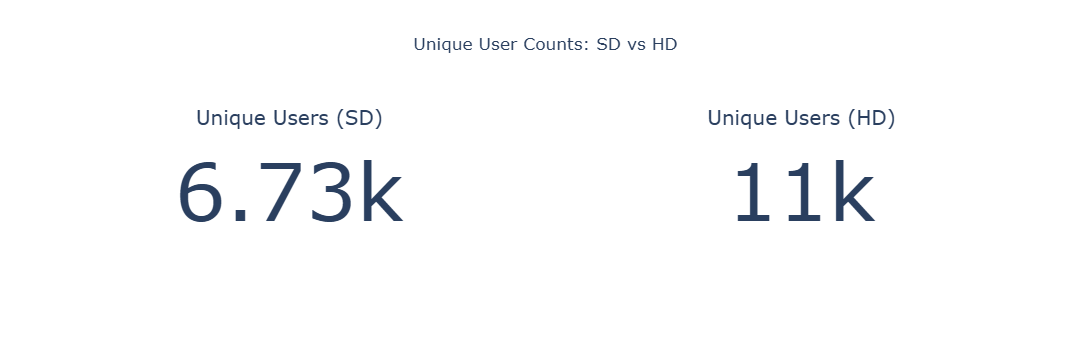

In [118]:
# Calculate the unique users by HD status 
unique_users_by_hd = df.groupby('hd')['user_id_maped'].nunique()
print("\nNumber of unique users by HD status:")
print(unique_users_by_hd)

#  here we Creating Indicator Figures 
# Use .get(key, default_value) to safely access counts, in case one category is missing
sd_users_count = unique_users_by_hd.get(0, 0)
hd_users_count = unique_users_by_hd.get(1, 0)  

# Create a figure with two side-by-side indicators
fig_indicators = make_subplots(
    rows=1, cols=2,
    specs=[[{'type' : 'indicator'}, {'type' : 'indicator'}]]
)

fig_indicators.add_trace(go.Indicator(
    mode="number",
    value=sd_users_count,
    title={"text": "Unique Users (SD)"}
), row=1, col=1)

fig_indicators.add_trace(go.Indicator(
    mode="number",
    value=hd_users_count,
    title={"text": "Unique Users (HD)"}
), row=1, col=2)

fig_indicators.update_layout(
    title_text="Unique User Counts: SD vs HD",
    title_x=0.5 # Center title
)
fig_indicators.show()

In [119]:
df

,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name,day_of_week_name
0,2017-05-27,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets,Saturday
1,2017-05-21,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana,Sunday
2,2017-08-10,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess,Thursday
3,2017-07-26,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess,Wednesday
4,2017-07-07,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
946496,2017-04-22,23716,Extraterrestrial,4865,MOVIE,0,0,Horror MovieExtraterrestrial (HD),Horror,0,0,Extraterrestrial,Saturday
946497,2017-11-29,1776,Friends The One With The Holiday Armadillo,1261,SERIES/EPISODES,7,10,Comedy MovieThe One With The Holiday Armadillo...,Comedy,0,0,Friends,Wednesday
946498,2017-06-15,1918,Masters of Horror Dreams In The Witch House,6,SERIES/EPISODES,1,2,Horror MovieDreams In The Witch House,Horror,0,0,Masters of Horror,Thursday
946499,2017-09-11,25737,Two Lovers and a Bear,72,MOVIE,0,0,Drama MovieTwo Lovers and a Bear (HD),Drama,0,1,Two Lovers and a Bear,Monday


In [123]:
# converting my df to csv "cleaned_stc_tv_data.csv"
df.to_csv("cleaned_stc_tv_data.csv", index=False)

print("Cleaned data saved to: cleaned_stc_tv_data.csv")

Cleaned data saved to: cleaned_stc_tv_data.csv
